<a href="https://colab.research.google.com/github/OmarAboElnaga/Students-Score-and-their-Habits/blob/main/Students'_Scores_and_their_habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv( "https://raw.githubusercontent.com/OmarAboElnaga/Students-Score-and-their-Habits/main/student_habits_performance.csv")
df.head(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [3]:
df.isna().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df = df.drop('parental_education_level', axis=1)

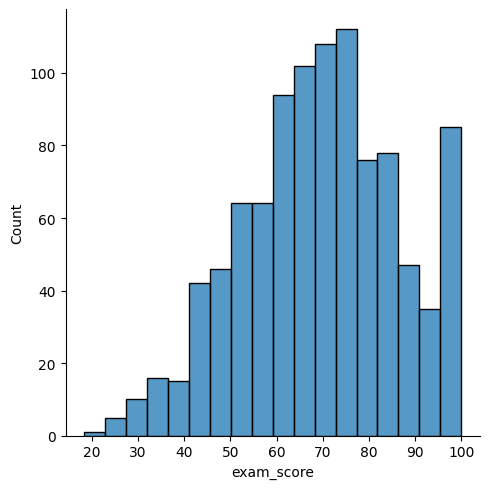

In [6]:
sns.displot(df.exam_score)

In [7]:
def group_exam_scores(df, score_column='exam_score'):
    bins = [0, 50, 60, 70, 80, 90, 99.9,100]
    labels = ['F', 'D', 'C', 'B', 'A', 'A+','Full Mark']
    df['score_group'] = pd.cut(df[score_column], bins=bins, labels=labels, right=True, include_lowest=True)
    return df
df = group_exam_scores(df)
print(df['score_group'].value_counts())

score_group
B            234
C            208
D            151
A            151
F            131
A+            77
Full Mark     48
Name: count, dtype: int64


In [8]:
df['Wasted_Time'] = df['netflix_hours'] + df['social_media_hours']

In [9]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,score_group,Wasted_Time
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,D,2.3
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,Average,8,No,100.0,Full Mark,5.1
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,Poor,1,No,34.3,F,4.4
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,F,4.9
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Good,1,No,66.4,C,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,B,2.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,C,3.4
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Good,9,Yes,64.4,C,3.9
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,C,5.2


In [10]:
df.to_csv("examScores.csv", index=False)

## Data Cleaning

In [11]:
df = df.drop(['student_id' ,'social_media_hours' , 'netflix_hours'] , axis=1)

In [12]:
df

,age,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,internet_quality,mental_health_rating,extracurricular_participation,exam_score,score_group,Wasted_Time
0,23,Female,0.0,No,85.0,8.0,Fair,6,Average,8,Yes,56.2,D,2.3
1,20,Female,6.9,No,97.3,4.6,Good,6,Average,8,No,100.0,Full Mark,5.1
2,21,Male,1.4,No,94.8,8.0,Poor,1,Poor,1,No,34.3,F,4.4
3,23,Female,1.0,No,71.0,9.2,Poor,4,Good,1,Yes,26.8,F,4.9
4,19,Female,5.0,No,90.9,4.9,Fair,3,Good,1,No,66.4,C,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,No,77.0,7.5,Fair,2,Good,6,Yes,76.1,B,2.1
996,17,Female,2.9,Yes,86.0,6.8,Poor,1,Average,6,Yes,65.9,C,3.4
997,20,Male,3.0,No,61.9,6.5,Good,5,Good,9,Yes,64.4,C,3.9
998,24,Male,5.4,Yes,100.0,7.6,Fair,0,Average,1,No,69.7,C,5.2


## Visualisation

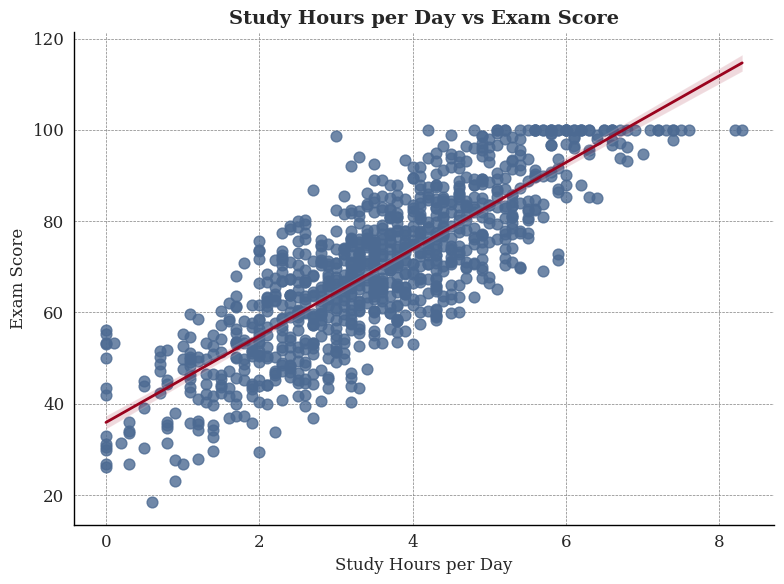

In [25]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.family": "serif",
    "axes.edgecolor": "black",
    "axes.linewidth": 1,
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

point_color = "#4C6A92"
line_color = "#9A031E"

plt.figure(figsize=(8, 6))
sns.regplot(
    x='study_hours_per_day',
    y='exam_score',
    data=df,
    scatter_kws={'alpha': 0.8, 'color': point_color, 's': 60},
    line_kws={'color': line_color, 'linewidth': 2}
)
plt.title('Study Hours per Day vs Exam Score', weight='bold')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
sns.despine()
plt.tight_layout()
plt.show()

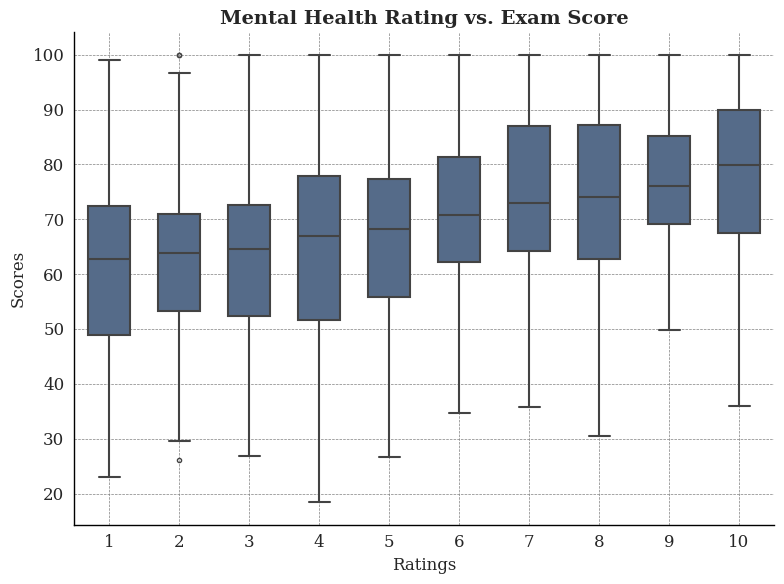

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='mental_health_rating',
    y='exam_score',
    data=df,
    color="#4C6A92",
    width=0.6,
    linewidth=1.5,
    fliersize=3
)
plt.title('Mental Health Rating vs. Exam Score', weight='bold')
plt.xlabel('Ratings')
plt.ylabel('Scores')
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


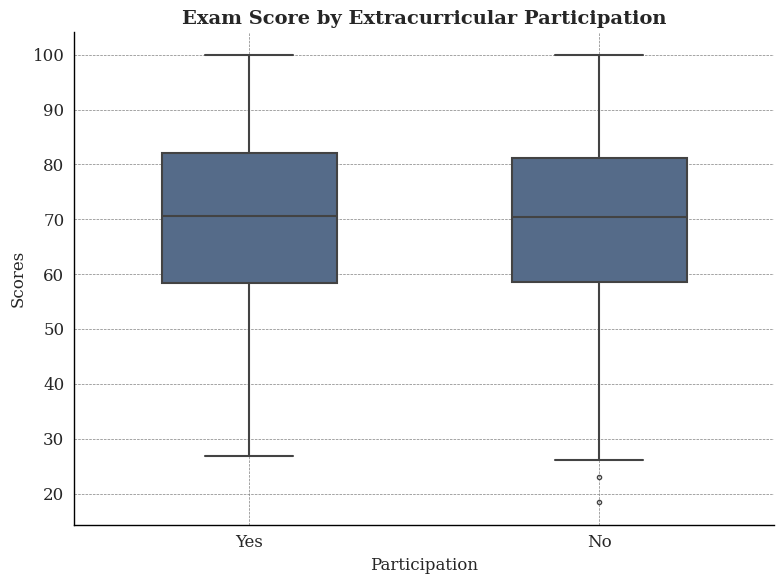

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='extracurricular_participation',
    y='exam_score',
    data=df,
    color="#4C6A92",
    width=0.5,
    linewidth=1.5,
    fliersize=3
)
plt.title('Exam Score by Extracurricular Participation', weight='bold')
plt.xlabel('Participation')
plt.ylabel('Scores')
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


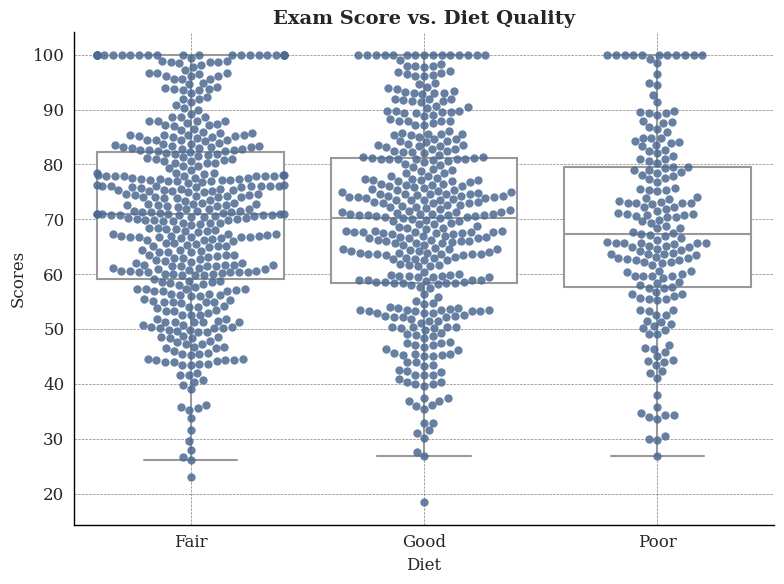

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='diet_quality',
    y='exam_score',
    data=df,
    color='white',
    linewidth=1.5,
    fliersize=0
)
sns.swarmplot(
    x='diet_quality',
    y='exam_score',
    data=df,
    color="#4C6A92",
    size=6,
    alpha=0.85
)
plt.title('Exam Score vs. Diet Quality', weight='bold')
plt.xlabel('Diet')
plt.ylabel('Scores')
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


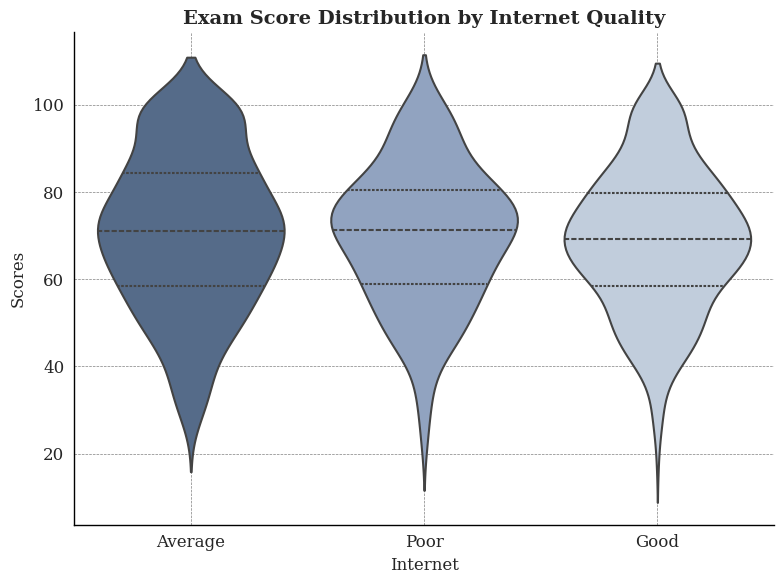

In [29]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    x='internet_quality',
    y='exam_score',
    data=df,
    inner='quartile',
    palette=["#4C6A92", "#89A1C8", "#BCCCE0"],
    linewidth=1.5
)
plt.title('Exam Score Distribution by Internet Quality', weight='bold')
plt.xlabel('Internet')
plt.ylabel('Scores')
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


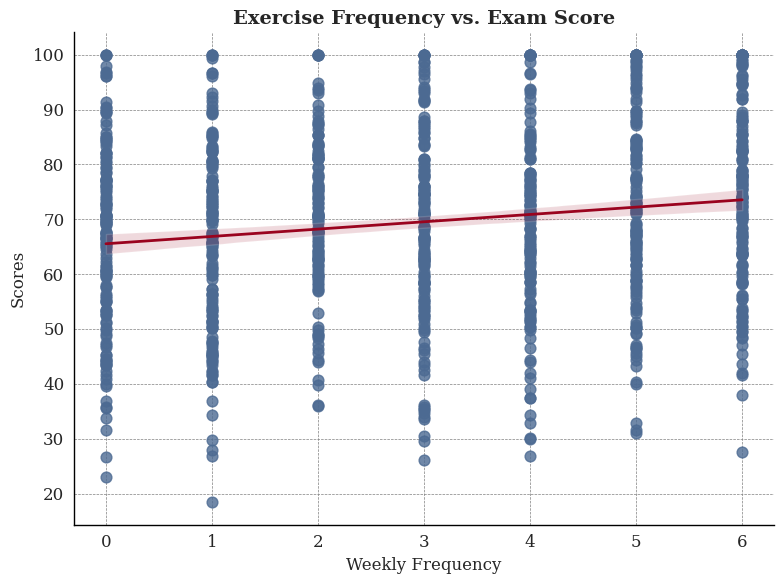

In [30]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='exercise_frequency',
    y='exam_score',
    data=df,
    scatter_kws={'color': "#4C6A92", 'alpha': 0.8, 's': 60},
    line_kws={'color': "#9A031E", 'linewidth': 2}
)
plt.title('Exercise Frequency vs. Exam Score', weight='bold')
plt.xlabel('Weekly Frequency')
plt.ylabel('Scores')
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


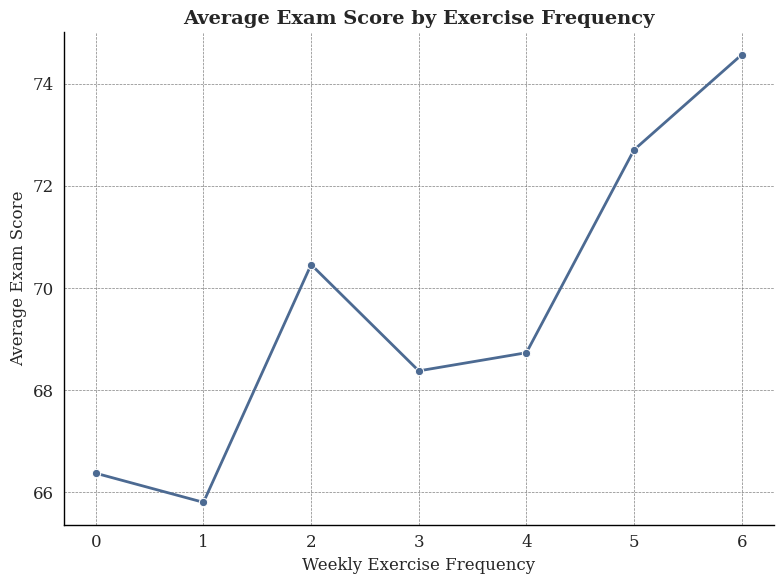

In [31]:
avg_scores = df.groupby('exercise_frequency')['exam_score'].mean().reset_index()
avg_scores = avg_scores.sort_values(by='exercise_frequency')
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='exercise_frequency',
    y='exam_score',
    data=avg_scores,
    marker='o',
    color='#4C6A92',
    linewidth=2
)
plt.title('Average Exam Score by Exercise Frequency', weight='bold')
plt.xlabel('Weekly Exercise Frequency')
plt.ylabel('Average Exam Score')
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

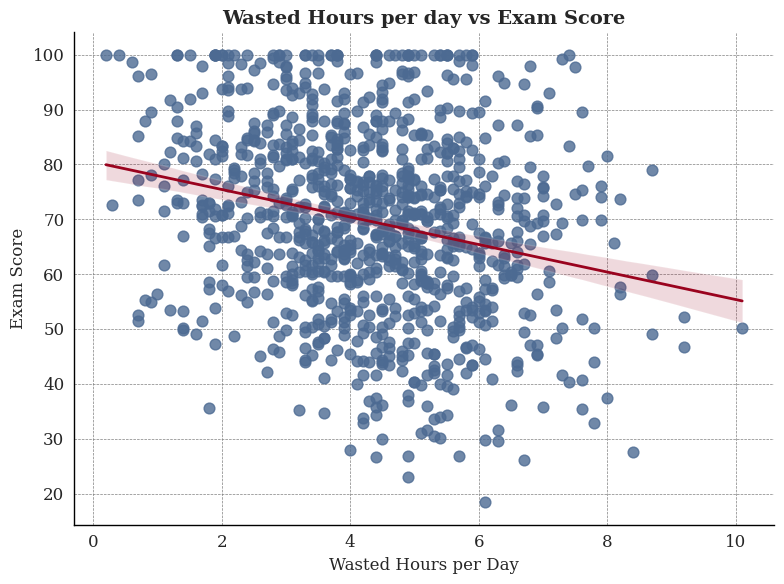

In [32]:
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "font.family": "serif",
    "axes.edgecolor": "black",
    "axes.linewidth": 1,
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.5
})

point_color = "#4C6A92"
line_color = "#9A031E"

plt.figure(figsize=(8, 6))
sns.regplot(
    x='Wasted_Time',
    y='exam_score',
    data=df,
    scatter_kws={'alpha': 0.8, 'color': point_color, 's': 60},
    line_kws={'color': line_color, 'linewidth': 2}
)
plt.title('Wasted Hours per day vs Exam Score', weight='bold')
plt.xlabel('Wasted Hours per Day')
plt.ylabel('Exam Score')
sns.despine()
plt.tight_layout()
plt.show()

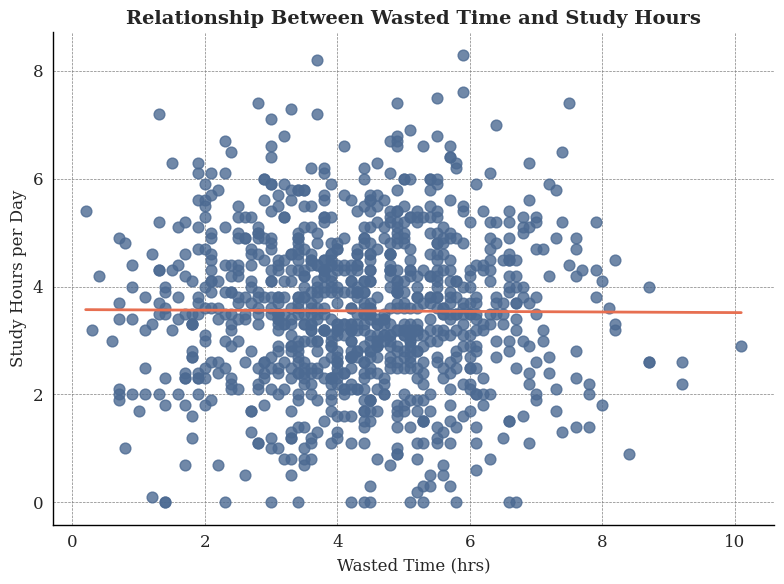

In [33]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Wasted_Time',
    y='study_hours_per_day',
    data=df,
    scatter_kws={'color': '#4C6A92', 's': 60, 'alpha': 0.8},
    line_kws={'color': '#E76F51', 'linewidth': 2},
    ci=None
)
plt.title('Relationship Between Wasted Time and Study Hours', weight='bold', fontsize=14)
plt.xlabel('Wasted Time (hrs)', fontsize=12)
plt.ylabel('Study Hours per Day', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
sns.despine()
plt.tight_layout()
plt.show()

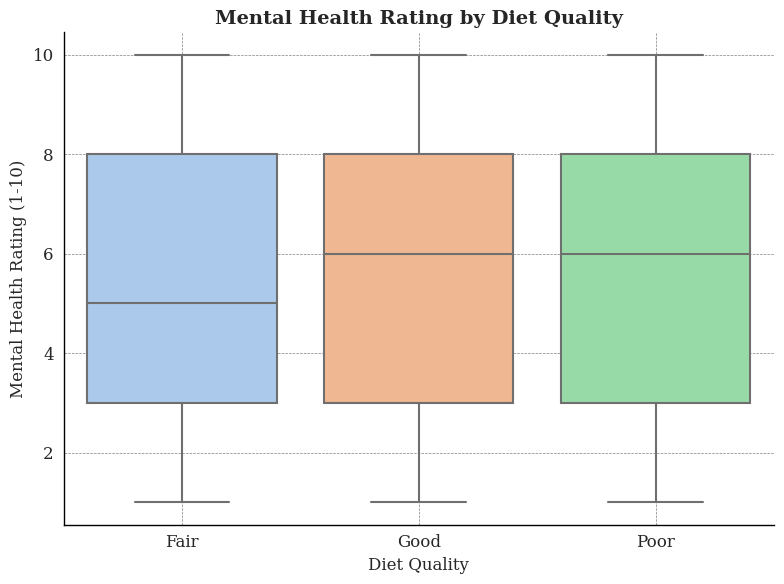

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='diet_quality',
    y='mental_health_rating',
    data=df,
    palette='pastel',
    linewidth=1.5,
    fliersize=0
)

plt.title('Mental Health Rating by Diet Quality', weight='bold', fontsize=14)
plt.xlabel('Diet Quality', fontsize=12)
plt.ylabel('Mental Health Rating (1-10)', fontsize=12)
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

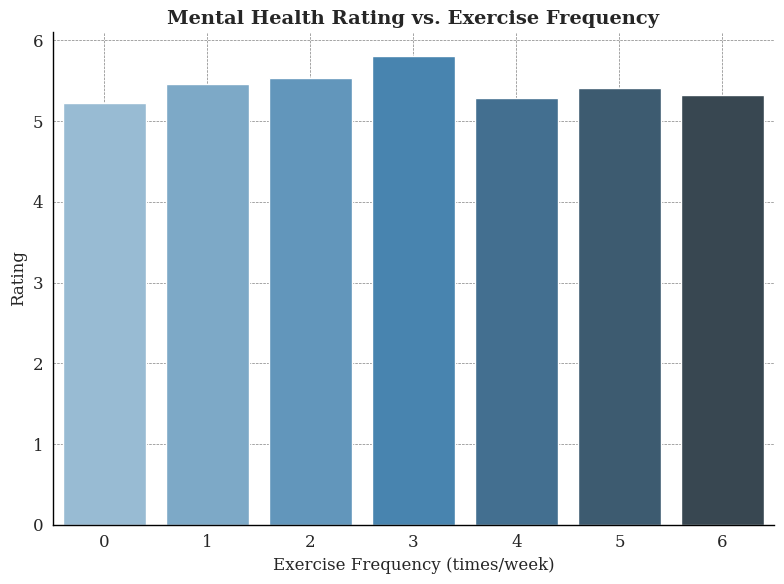

In [35]:
avg_mental_health = df.groupby('exercise_frequency')['mental_health_rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    data=avg_mental_health,
    x='exercise_frequency',
    y='mental_health_rating',
    palette='Blues_d'
)
plt.title('Mental Health Rating vs. Exercise Frequency', weight='bold', fontsize=14)
plt.xlabel('Exercise Frequency (times/week)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


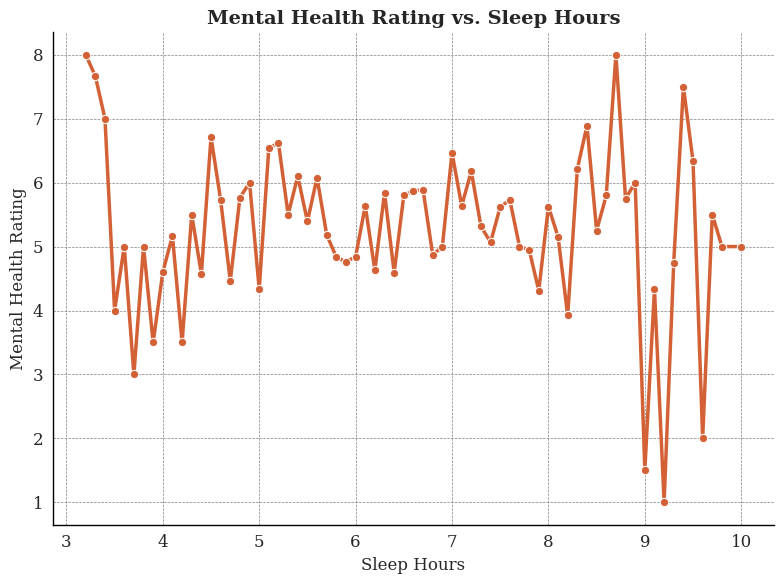

In [36]:
avg_sleep_mental = df.groupby('sleep_hours')['mental_health_rating'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=avg_sleep_mental,
    x='sleep_hours',
    y='mental_health_rating',
    marker='o',
    linewidth=2.5,
    color='#D36135'
)
plt.title('Mental Health Rating vs. Sleep Hours', weight='bold', fontsize=14)
plt.xlabel('Sleep Hours', fontsize=12)
plt.ylabel('Mental Health Rating', fontsize=12)
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()


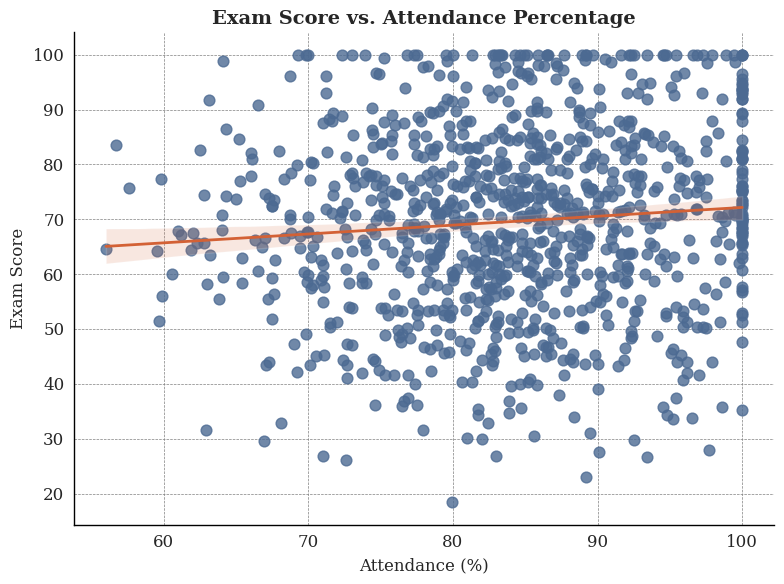

In [37]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x='attendance_percentage',
    y='exam_score',
    data=df,
    scatter_kws={'color': '#4C6A92', 's': 60, 'alpha': 0.8},
    line_kws={'color': '#D36135', 'linewidth': 2}
)
plt.title('Exam Score vs. Attendance Percentage', weight='bold', fontsize=14)
plt.xlabel('Attendance (%)', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

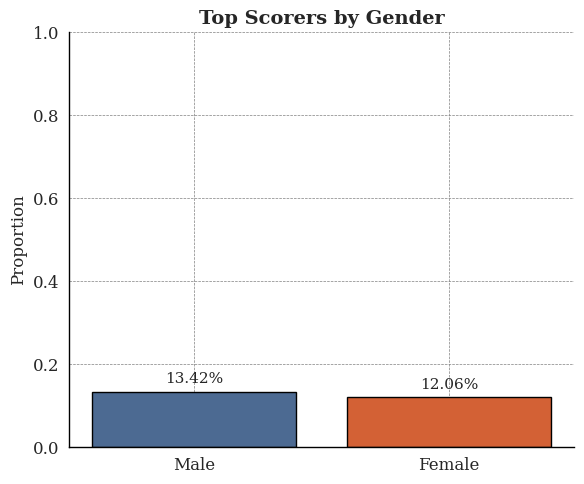

In [38]:
male_top = df[(df['gender'] == 'Male') & (df['score_group'].isin(['A+', 'Full Mark']))].shape[0]
female_top = df[(df['gender'] == 'Female') & (df['score_group'].isin(['A+', 'Full Mark']))].shape[0]

male_total = df[df['gender'] == 'Male'].shape[0]
female_total = df[df['gender'] == 'Female'].shape[0]

male_prop = male_top / male_total
female_prop = female_top / female_total

plt.figure(figsize=(6, 5))
plt.bar(['Male', 'Female'], [male_prop, female_prop],
        color=['#4C6A92', '#D36135'],
        edgecolor='black')
plt.ylim(0, 1)
plt.ylabel('Proportion', fontsize=12)
plt.title('Top Scorers by Gender', fontsize=14, weight='bold')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
for i, v in enumerate([male_prop, female_prop]):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()

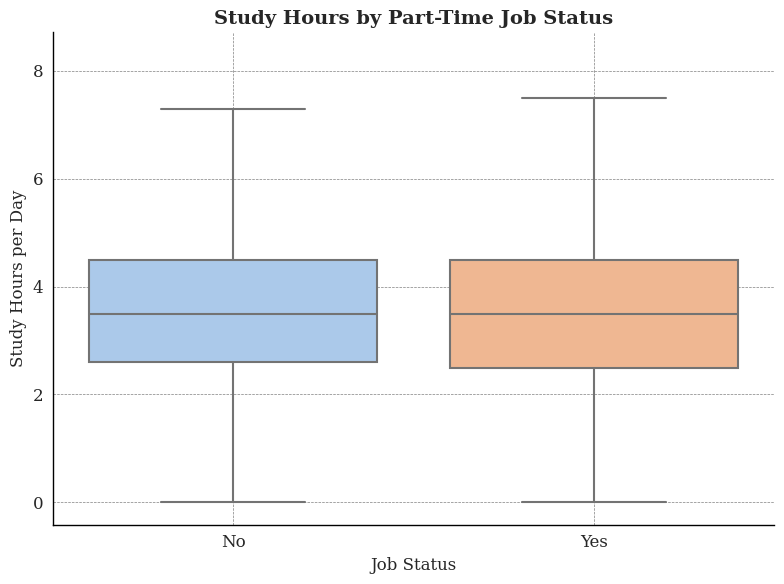

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='part_time_job',
    y='study_hours_per_day',
    data=df,
    palette='pastel',
    linewidth=1.5,
    fliersize=0
)
plt.title('Study Hours by Part-Time Job Status', weight='bold', fontsize=14)
plt.xlabel('Job Status', fontsize=12)
plt.ylabel('Study Hours per Day', fontsize=12)
sns.despine()
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

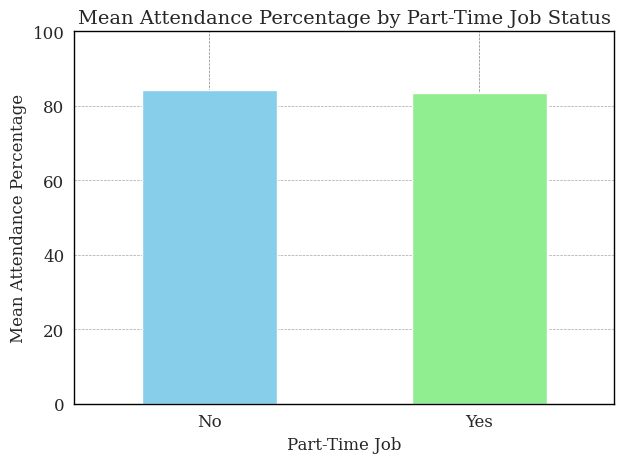

In [40]:
mean_attendance = df.groupby('part_time_job')['attendance_percentage'].mean()

# Plot
mean_attendance.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Mean Attendance Percentage by Part-Time Job Status')
plt.xlabel('Part-Time Job')
plt.ylabel('Mean Attendance Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Assuming attendance is a percentage
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Hypothesis Testing

####1st Test
#####Study hours affects your exam grades
#####Test Used: Pearson
#####H₀: There is no correlation between study hours and exam grades
#####H₁: There is a positive correlation between study hours and exam



In [ ]:
study_hours = df['study_hours_per_day']
exam_scores = df['exam_score']

corr_coef, p_value = pearsonr(study_hours, exam_scores)

print("Pearson Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis - significant positive correlation")
else:
    print("Fail to reject the null hypothesis - no significant correlation")

Pearson Correlation Coefficient: 0.8254185093960442
P-value: 4.595701453345048e-250
Reject the null hypothesis - significant positive correlation


####2nd test
#####Mental health affects your exam grades
#####Test Used: Pearson
#####H₀: There is no correlation between mental health rating and exam score.
#####H₁: Mental health rating is positively related correlated with the final exam score.



In [ ]:

mental_health = df['mental_health_rating']
exam_scores = df['exam_score']
correlation, p_val = pearsonr(mental_health, exam_scores)

print("Correlation coefficient:", correlation)
print("p-value:", p_val)

if p_val < 0.05:
    print("Reject the null hypothesis - positive correlation exists")
else:
    print("Fail to reject the null hypothesis")


Correlation coefficient: 0.32152293065514603
p-value: 1.752646701164105e-25
Reject the null hypothesis - positive correlation exists


####3rd test
#####Is attendance really that important
#####Test Used: Pearson
#####H₀: There is no correlation between attendance and exam grades
#####H₁: There is a positive correlation between attendance and exam grades


In [ ]:
attendance = df['attendance_percentage']
exam_scores = df['exam_score']

corr_coef, p_value = pearsonr(attendance, exam_scores)

print("Pearson Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis - significant positive correlation")



Pearson Correlation Coefficient: 0.08983560176992739
P-value: 0.004468430405695773
Reject the null hypothesis - significant positive correlation


#### 4th Test
###### Wasted time and study time
###### Test Used: Pearson
###### H₀: There is no linear correlation between Wasted Time and Study Time.
###### H₁: There is a negative correlation between Wasted Time and Study Time.


In [ ]:
wasted_time = df['Wasted_Time']
study_time = df['study_hours_per_day']
corr_coef, p_value = pearsonr(wasted_time, study_time)

print("Pearson Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print(f"Reject the null hypothesis")
    if corr_coef < 0:
        print("There is a statistically significant negative correlation between wasted time and study time.")
    else:
        print("There is a statistically significant positive correlation between wasted time and study time.")
else:
    print(f"Fail to reject the null hypothesis")
    print("There is no statistically significant correlation between wasted time and study time.")

Pearson Correlation Coefficient: -0.006075384516537954
P-value: 0.8478346301436277
Fail to reject the null hypothesis
There is no statistically significant correlation between wasted time and study time.


#### 5th Test
##### Relationship between diet and mental health
##### Test Used: Anova
##### H₀: Mean mental health are equal across levels of diet quality
##### H₁: Mean mental health are different across different types of diet qualities

In [ ]:
poor_diet = df[df['diet_quality'] == 'Poor']['mental_health_rating']
fair_diet = df[df['diet_quality'] == 'Fair']['mental_health_rating']
good_diet = df[df['diet_quality'] == 'Good']['mental_health_rating']
f_stat, p_value = f_oneway(poor_diet, fair_diet, good_diet)

print("F-statistic:", f_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis - diet quality affects mental health")
else:
    print("Fail to reject the null hypothesis - no significant difference")

F-statistic: 2.5953920454534583
P-value: 0.07512070371951479
Fail to reject the null hypothesis - no significant difference


#### 6th Test
##### A healthy mind in healthy body - mental health vs. exercise
##### Test Used: Pearson
##### H₀: There is no correlation between number of exercising hours and mental heath
##### H₁: There is a positive correlation between number of exercising hours and mental heath

In [ ]:
mental_health = df['mental_health_rating']
exercise = df['exercise_frequency']
corr_coef, p_value = pearsonr(exercise, mental_health)

print("Pearson Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis - significant correlation exists")
else:
    print("Fail to reject the null hypothesis - no significant correlation")

Pearson Correlation Coefficient: -0.00024229265272990123
P-value: 0.9938943408855587
Fail to reject the null hypothesis - no significant correlation


#### 7th Test
##### How sleeping hours affect mental health
##### Test Used: Pearson
##### H₀: There is no correlation between hours of sleep and mental heath
##### H₁: There is a positive correlation between hours of sleep and mental heath

In [ ]:
corr_coef, p_value = pearsonr(df['sleep_hours'], df['mental_health_rating'])

print("Pearson Correlation Coefficient:", corr_coef)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis - significant correlation exists")
else:
    print("Fail to reject the null hypothesis - no significant correlation")

Pearson Correlation Coefficient: -0.006507964872229755
P-value: 0.8371465796330939
Fail to reject the null hypothesis - no significant correlation


####8th Test
#####Does having a job affect attendance
#####Test Used: T-Test
#####H₀: The mean attendance percentage is equal for students with and without part-time jobs.
#####H₁: There is a significant difference in mean attendance percentage between students with and without part-time jobs.



In [ ]:
attendance_with_job = df[df['part_time_job'] == 'Yes']['attendance_percentage']
attendance_without_job = df[df['part_time_job'] == 'No']['attendance_percentage']

t_stat, p_value = ttest_ind(attendance_with_job, attendance_without_job, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis — there is a significant difference in attendance between students with and without part-time jobs.")
else:
    print("Fail to reject the null hypothesis — no significant difference in attendance between students with and without part-time jobs.")

T-statistic: -1.3490879496546764
P-value: 0.17817939496495996
Fail to reject the null hypothesis — no significant difference in attendance between students with and without part-time jobs.


####9th Test
#####Effect of a part-time job on study hours
#####Test Used: T-Test
#####H₀: There is no significant difference in the mean study time between students with and without part-time jobs.
#####H₁: There is a significant difference in the mean study time between students with and without part-time jobs.


In [ ]:
study_with_job = df[df['part_time_job'] == 'Yes']['study_hours_per_day']
study_without_job = df[df['part_time_job'] == 'No']['study_hours_per_day']

t_stat, p_value = ttest_ind(study_with_job, study_without_job, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis — there is a significant difference in study time between students with and without part-time jobs.")
else:
    print("Fail to reject the null hypothesis — no significant difference in study time between students with and without part-time jobs.")

T-statistic: -0.8807209649751775
P-value: 0.37912730586634147


#### 10th Test
##### Smarter gender?
##### Test Used: Z-Test
##### H₀: Propotion of Males and Females regarding Fullmark & A+ is equal
##### H₁: Propotion of Males and Females regarding Fullmark & A+ is not equal

In [ ]:
male_top = df[(df['gender'] == 'Male') & (df['score_group'].isin(['A+', 'Full Mark']))].shape[0]
female_top = df[(df['gender'] == 'Female') & (df['score_group'].isin(['A+', 'Full Mark']))].shape[0]

male_total = df[df['gender'] == 'Male'].shape[0]
female_total = df[df['gender'] == 'Female'].shape[0]

top = np.array([male_top, female_top])
total = np.array([male_total, female_total])
z_stat, p_value = proportions_ztest(top, total)

print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis - significant difference in top performance exists between genders")
else:
    print("Fail to reject the null hypothesis - no significant difference found")


Z-statistic: 0.6309
P-value: 0.5281
Fail to reject the null hypothesis - no significant difference found


## Hypothesis Testing Before ML

### Age

In [ ]:
corr, p_val = pearsonr(df['age'], df['exam_score'])
if p_val> 0.05:
   print("Failed to Reject, There is no correlation between Age and exam score")
else:
  print("Reject Null, There is a positive correlation between Age and exam score")

Failed to Reject, There is no correlation between Age and exam score


### Gender

In [ ]:
males = df[df['gender'] == 'male']['exam_score']
females = df[df['gender'] == 'female']['exam_score']
t_stat, p_val = ttest_ind(males, females, nan_policy='omit')
if p_val > 0.05:
    print(f"Failed to reject the null hypothesis (p = {p_val:.4f}):\nNo significant difference in mean exam scores between genders.")
else:
    print(f"Reject the null hypothesis (p = {p_val:.4f}):\nThere is a significant difference in mean exam scores between genders.")

Reject the null hypothesis (p = nan):
There is a significant difference in mean exam scores between genders.


### Study Hours

In [ ]:
corr, p_val = pearsonr(df['study_hours_per_day'], df['exam_score'])
if p_val> 0.05:
   print("Failed to Reject , There is no relation between study hours and exam score")
else:
  print("Reject Null , There is a correlation between study hours and exam score")

Reject Null , There is a correlation between study hours and exam score


### Part-time Job

In [ ]:
No_work = df[df['part_time_job']== 'No']['exam_score']
Yes_work = df[df['part_time_job']=='Yes']['exam_score']
t_stat, p_val = ttest_ind(No_work, Yes_work, nan_policy='omit')
if p_val> 0.05:
   print("Failed to Reject,  The Mean of Exam Scores is the same accross people who work and those who dont")
else:
  print("Reject Null , The Mean of Exam Score different")

Failed to Reject,  The Mean of Exam Scores is the same accross people who work and those who dont


### Attendance

In [ ]:
corr, p_val = pearsonr(df['attendance_percentage'], df['exam_score'])
if p_val> 0.05:
   print("Failed to Reject, There is no correlation between attendance and exam score")
else:
  print("Reject Null, There is a positive correlation between attendance and exam score")

Reject Null, There is a positive correlation between attendance and exam score


### Sleeping Hours

In [ ]:
corr, p_val = pearsonr(df['sleep_hours'], df['exam_score'])
if p_val> 0.05:
   print("Failed to Reject,  There is no correlation between sleep and exam score")
else:
  print("Reject Null, There is a positive correlation between sleep and exam score")

Reject Null, There is a positive correlation between sleep and exam score


### Diet Quality

In [ ]:
fair_scores = df[df['diet_quality'] == 'Fair']['exam_score']
good_scores = df[df['diet_quality'] == 'Good']['exam_score']
poor_scores = df[df['diet_quality'] == 'Poor']['exam_score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(fair_scores, good_scores, poor_scores)

# Output the result
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Interpret
if p_value < 0.05:
    print("Reject the null hypothesis: Diet quality affects exam score.")
else:
    print("Fail to reject the null hypothesis: No significant effect.")

F-statistic: 1.2662049986695567
p-value: 0.28235232253240805
Fail to reject the null hypothesis: No significant effect.


### Exercise Frequency

In [ ]:
pearson_corr, pearson_p = pearsonr(df['exercise_frequency'], df['exam_score'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p)

if pearson_p < 0.05:
    print("Reject H₀: Significant linear correlation.")
else:
    print("Fail to reject H₀: No significant linear correlation.")


Pearson Correlation Coefficient: 0.16010746437908208
Pearson p-value: 3.5886271483389575e-07
Reject H₀: Significant linear correlation.


### Internet Quality

In [ ]:
df.internet_quality.value_counts()

,count
internet_quality,
Good,447
Average,391
Poor,162


In [ ]:
average_internet = df[df['internet_quality'] == 'Average']['exam_score']
good_internet = df[df['internet_quality'] == 'Good']['exam_score']
poor_internet = df[df['internet_quality'] == 'Poor']['exam_score']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(average_internet, good_internet, poor_internet)

# Output the result
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Interpret
if p_value < 0.05:
    print("Reject the null hypothesis: Internet Quality affects exam score.")
else:
    print("Fail to reject the null hypothesis: No significant effect.")

F-statistic: 1.4630112114998204
p-value: 0.2320346510834057
Fail to reject the null hypothesis: No significant effect.


### Mental Health Rating

In [ ]:
pearson_corr, pearson_p = pearsonr(df['mental_health_rating'], df['exam_score'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p)

if pearson_p < 0.05:
    print("Reject H₀: Significant linear correlation.")
else:
    print("Fail to reject H₀: No significant linear correlation.")


Pearson Correlation Coefficient: 0.32152293065514603
Pearson p-value: 1.752646701164105e-25
Reject H₀: Significant linear correlation.


### Extracurricular Participation

In [ ]:
yes_scores = df[df['extracurricular_participation'] == 'Yes']['exam_score']
no_scores = df[df['extracurricular_participation'] == 'No']['exam_score']

# Perform independent t-test
t_stat, p_value = ttest_ind(yes_scores, no_scores, equal_var=False)  # Welch’s t-test

# Output
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Participation affects exam scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


t-statistic: 0.02745889675286198
p-value: 0.978102864929393
Fail to reject the null hypothesis: No significant difference.


### Wasted Time

In [ ]:
pearson_corr, pearson_p = pearsonr(df['Wasted_Time'], df['exam_score'])

print("Pearson Correlation Coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p)

if pearson_p < 0.05:
    print("Reject H₀: Significant linear correlation.")
else:
    print("Fail to reject H₀: No significant linear correlation.")


Pearson Correlation Coefficient: -0.23763123167240488
Pearson p-value: 2.6473295497128505e-14
Reject H₀: Significant linear correlation.


## Building ML Model

### Feature Selection

###### Based On Hypothesis Testings only features can be selected and might effect the exam score are:
###### Gender
###### Study hours
###### Attendance
###### Sleeping hours
###### exercise Frequency
###### mental health
###### wasted time

In [ ]:
x = df[['gender','study_hours_per_day','attendance_percentage','sleep_hours','exercise_frequency','mental_health_rating','Wasted_Time']]
y = df['exam_score']

### Data preprocessing

In [ ]:
le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])

In [ ]:
numerical_cols = x.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

In [ ]:
y = np.array(y)
scaler = StandardScaler()
y = scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

### Training Models

In [ ]:
try:
    from xgboost import XGBRegressor
    has_xgb = True
except ImportError:
    has_xgb = False


models = {
    "LinearRegression": (LinearRegression(), {}),
    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [25,50, 100],
            "max_depth": [2,5, 10, None]
        }
    ),
    "DecisionTree": (
        DecisionTreeRegressor(random_state=42),
        {
            "max_depth": [3, 5, 10, None]
        }
    ),
    "SVR": (
        SVR(),
        {
            "C": [0.01,0.1, 1, 10],
            "kernel": ["rbf", "linear"]
        }
    )
}

if has_xgb:
    models["XGBoost"] = (
        XGBRegressor(random_state=42, verbosity=0),
        {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 7]
        }
    )

results = []

for name, (model, param_grid) in models.items():
    print(f"\n🔍 Tuning {name}...")
    if param_grid:
        grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    else:
        grid = model

    if isinstance(grid, GridSearchCV):
        grid.fit(x_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        grid.fit(x_train, y_train)
        best_model = grid
        best_params = "Default"

    score = best_model.score(x_test, y_test)*100

    results.append({
        "Model": name,
        "Best Params": best_params,
        "Accuracy (%)": score
    })

# Create DataFrame
results_df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False)
print("\n📊 Model Comparison using .score():")
print(results_df)


🔍 Tuning LinearRegression...

🔍 Tuning RandomForest...

🔍 Tuning DecisionTree...

🔍 Tuning SVR...

🔍 Tuning XGBoost...

📊 Model Comparison using .score():
              Model                              Best Params  Accuracy (%)
3               SVR           {'C': 0.1, 'kernel': 'linear'}     89.468570
0  LinearRegression                                  Default     89.455311
4           XGBoost     {'max_depth': 3, 'n_estimators': 50}     86.246245
1      RandomForest  {'max_depth': None, 'n_estimators': 50}     85.806628
2      DecisionTree                         {'max_depth': 5}     74.489874


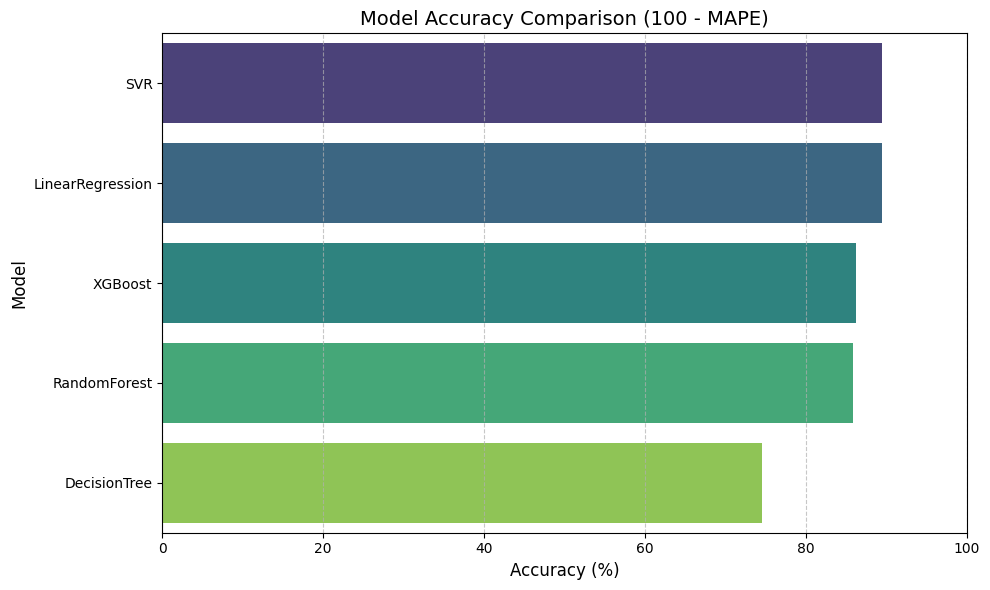

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Accuracy (%)", y="Model", palette="viridis")

plt.title("Model Accuracy Comparison (100 - MAPE)", fontsize=14)
plt.xlabel("Accuracy (%)", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
